# Computer Vision Project: Unpaired Image-to-Image Translation with CycleGAN
**Authors: Kerr Tan, William Cheng, Zitong Luo**

## Install

In [1]:
# clone github repo
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

fatal: destination path 'pytorch-CycleGAN-and-pix2pix' already exists and is not an empty directory.


In [2]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [3]:
"""
%%capture
!pip install -r requirements.txt
"""

'\n%%capture\n!pip install -r requirements.txt\n'

## Datasets

**monet2photo**

In [4]:
"""
%%capture
%%bash
FILE=monet2photo
echo "Specified [$FILE]"
URL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"
ZIP_FILE="./datasets/$FILE.zip"
TARGET_DIR="./datasets/$FILE/"

mkdir -p ./datasets
wget -N "$URL" -O "$ZIP_FILE"
mkdir -p "$TARGET_DIR"
unzip "$ZIP_FILE" -d ./datasets/
rm "$ZIP_FILE"
"""

'\n%%capture\n%%bash\nFILE=monet2photo\necho "Specified [$FILE]"\nURL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"\nZIP_FILE="./datasets/$FILE.zip"\nTARGET_DIR="./datasets/$FILE/"\n\nmkdir -p ./datasets\nwget -N "$URL" -O "$ZIP_FILE"\nmkdir -p "$TARGET_DIR"\nunzip "$ZIP_FILE" -d ./datasets/\nrm "$ZIP_FILE"\n'

**ukiyoe2photo**

In [5]:
"""
%%capture
%%bash
FILE=ukiyoe2photo
echo "Specified [$FILE]"
URL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"
ZIP_FILE="./datasets/$FILE.zip"
TARGET_DIR="./datasets/$FILE/"

mkdir -p ./datasets
wget -N "$URL" -O "$ZIP_FILE"
mkdir -p "$TARGET_DIR"
unzip "$ZIP_FILE" -d ./datasets/
rm "$ZIP_FILE"
"""

'\n%%capture\n%%bash\nFILE=ukiyoe2photo\necho "Specified [$FILE]"\nURL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"\nZIP_FILE="./datasets/$FILE.zip"\nTARGET_DIR="./datasets/$FILE/"\n\nmkdir -p ./datasets\nwget -N "$URL" -O "$ZIP_FILE"\nmkdir -p "$TARGET_DIR"\nunzip "$ZIP_FILE" -d ./datasets/\nrm "$ZIP_FILE"\n'

**vangogh2photo**

In [6]:
"""
%%capture
%%bash
FILE=vangogh2photo
echo "Specified [$FILE]"
URL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"
ZIP_FILE="./datasets/$FILE.zip"
TARGET_DIR="./datasets/$FILE/"

mkdir -p ./datasets
wget -N "$URL" -O "$ZIP_FILE"
mkdir -p "$TARGET_DIR"
unzip "$ZIP_FILE" -d ./datasets/
rm "$ZIP_FILE"
"""

'\n%%capture\n%%bash\nFILE=vangogh2photo\necho "Specified [$FILE]"\nURL="http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/$FILE.zip"\nZIP_FILE="./datasets/$FILE.zip"\nTARGET_DIR="./datasets/$FILE/"\n\nmkdir -p ./datasets\nwget -N "$URL" -O "$ZIP_FILE"\nmkdir -p "$TARGET_DIR"\nunzip "$ZIP_FILE" -d ./datasets/\nrm "$ZIP_FILE"\n'

**Datasets Showcase**

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from PIL import Image

def load_train_images_from_datasets(base_path, styles):
    images = {}
    for col, style in enumerate(styles):
        trainA_dir = os.path.join(base_path, f"{style}/trainA")
        if os.path.exists(trainA_dir):
            trainA_files = [f for f in os.listdir(trainA_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
            if trainA_files:
                random_file = random.choice(trainA_files)
                img = np.array(Image.open(os.path.join(trainA_dir, random_file)))
                images[(0, col)] = img
        
        trainB_dir = os.path.join(base_path, f"{style}/trainB")
        if os.path.exists(trainB_dir):
            trainB_files = [f for f in os.listdir(trainB_dir) if f.endswith(('.jpg', '.png', '.jpeg'))]
            if trainB_files:
                random_file = random.choice(trainB_files)
                img = np.array(Image.open(os.path.join(trainB_dir, random_file)))
                images[(1, col)] = img
    return images

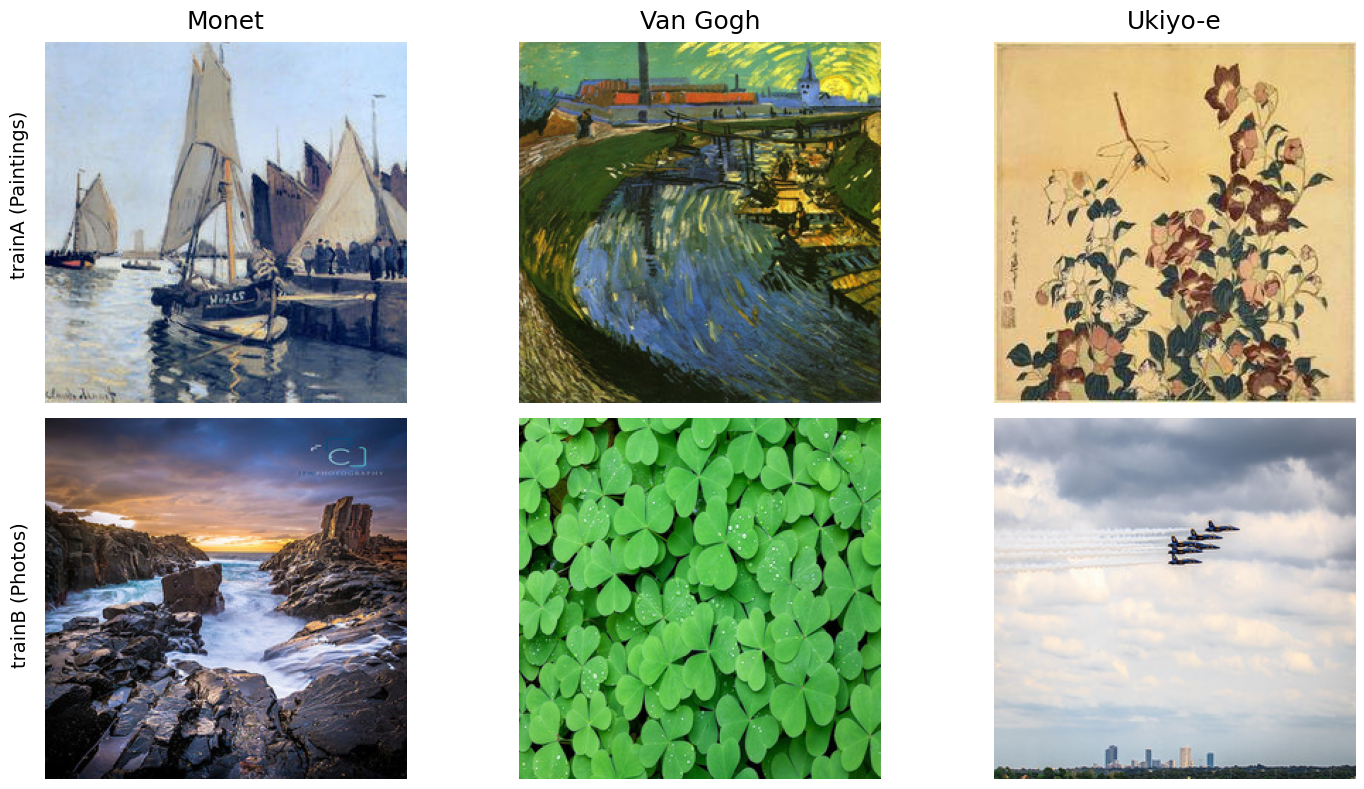

In [8]:
# define datasets styles for showcase
styles = ["monet2photo", "vangogh2photo", "ukiyoe2photo"]
style_names = ["Monet", "Van Gogh", "Ukiyo-e"]
row_labels = ["trainA (Paintings)", "trainB (Photos)"]
path = "./datasets"

images = load_train_images_from_datasets(path, styles)

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for col, style in enumerate(style_names):
    axes[0, col].set_title(style, fontsize=18, pad=10)
for ax in axes.flatten():
    ax.axis('off')
for (row, col), img in images.items():
    axes[row, col].imshow(img)
fig.text(0.04, 0.75, 'trainA (Paintings)', va='center', rotation='vertical', fontsize=14)
fig.text(0.04, 0.25, 'trainB (Photos)', va='center', rotation='vertical', fontsize=14)

plt.tight_layout()